In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')


In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
x =df[['petal_length','petal_width']]
species_to_num = {'setosa' : 0,
                 'versicolor' : 1,
                 'virginica' : 2}
df['species'] = df['species'].map(species_to_num)
y= df['species']

In [4]:
from sklearn.neighbors import KNeighborsClassifier

In [5]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(x,y)

KNeighborsClassifier(n_neighbors=50)

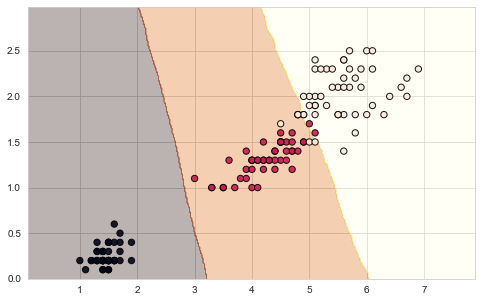

In [6]:
Xv = x.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(8,5))

ax = plt.contourf(xx,yy,z, cmap = 'afmhot', alpha=0.3, 
                  );
plt.scatter(x.values[:, 0], x.values[:, 1], c=y, s=40, 
            alpha=0.9, edgecolors='k');

In [17]:
X = df.drop(columns='species')
y = df['species']

In [18]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

#  ssepal length vs width(setosa vs versicolor)

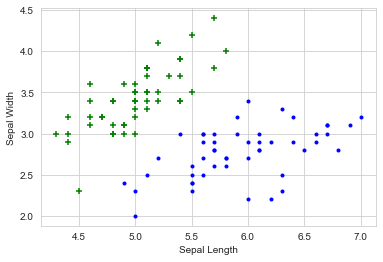

In [19]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal_length'], df0['sepal_width'],color="green",marker='+')
plt.scatter(df1['sepal_length'], df1['sepal_width'],color="blue",marker='.')

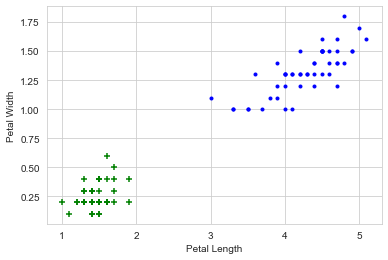

In [20]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal_length'], df0['petal_width'],color="green",marker='+')
plt.scatter(df1['petal_length'], df1['petal_width'],color="blue",marker='.')

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [47]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [48]:
knn.score(X_test,y_test)

0.9666666666666667

In [49]:
knn.predict([[4.8,3.0,1.5,0.3]])

array([0], dtype=int64)

Text(43.0, 0.5, 'Truth')

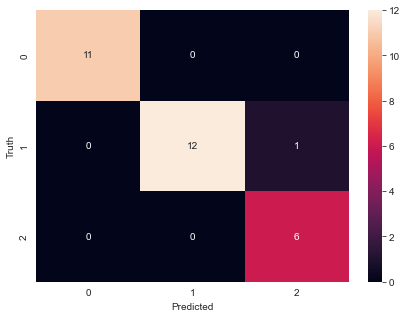

In [50]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 10,
 'p': 2,
 'weights': 'uniform'}

In [79]:
params = {'n_neighbors' : list(range(1,100)),
         'metric': ['euclidean','minkowski']}

In [89]:
grid_search_cv = GridSearchCV(KNeighborsClassifier(),params,cv=10)

In [90]:
grid_search_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [91]:
grid_search_cv.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [96]:
knn = KNeighborsClassifier(n_neighbors=9,metric='euclidean')

In [97]:
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [98]:
knn.score(X_test,y_test)

0.9666666666666667

In [99]:
knn.predict([[4.8,3.0,1.5,0.3]])

array([0], dtype=int64)